In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
path = r"Data\superhero_data.csv"

In [4]:
data = pd.read_csv(path)
data.head()

,ID,Name,Alignment,Gender,Intelligence,Strength,Speed,Durability,Power,Combat,Total,Height,Weight,SkinColor,EyeColor,HairColor,Race
0,0,3-D Man,good,Male,50,31,43,32,25,52,233,203.0,441,-,yellow,No Hair,Human
1,1,A-Bomb,good,Male,38,100,17,80,17,64,316,191.0,65,blue,blue,No Hair,Icthyo Sapien
2,2,Abe Sapien,good,Male,88,14,35,42,35,85,299,185.0,90,red,blue,No Hair,Ungaran
3,3,Abin Sur,good,Male,50,90,53,64,84,65,406,203.0,441,-,green,No Hair,Human / Radiation
4,4,Abomination,bad,Male,63,80,53,90,55,95,436,-99.0,-99,-,blue,Black,Cosmic Entity


In [7]:
data.Gender.replace('-', 'Agender', inplace = True)

In [9]:
gender_count = data.Gender.value_counts()

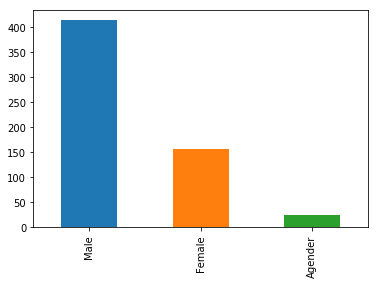

In [12]:
gender_count.plot(kind='bar')

In [13]:
alignment = data.Alignment.value_counts()
alignment

good       420
bad        163
neutral     11
Name: Alignment, dtype: int64

Text(0,0.5,'Character Alignment')

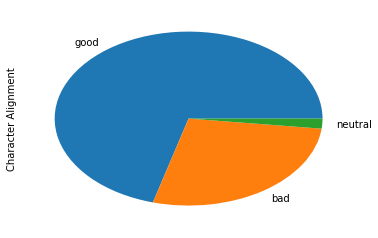

In [18]:
alignment.plot(kind='pie')
plt.ylabel('Character Alignment')

In [20]:
sc_df = data[['Strength', 'Combat']]
sc_df.head()

,Strength,Combat
0,31,52
1,100,64
2,14,85
3,90,65
4,80,95


In [25]:
sc_covariance = sc_df.cov().loc['Strength','Combat']
sc_strength = sc_df.Strength.std()
sc_combat = sc_df.Combat.std()
sc_pearson = sc_covariance/(sc_strength*sc_combat)
print(sc_covariance, sc_strength, sc_combat, sc_pearson)

617.4890075573043 32.46856096483724 33.24278591248973 0.5720958235612109


In [26]:
ic_df = data[['Intelligence', 'Combat']]
ic_df.head()

,Intelligence,Combat
0,50,52
1,38,64
2,88,85
3,50,65
4,63,95


In [28]:
ic_covariance = ic_df.cov().loc['Intelligence','Combat']
ic_intelligence = ic_df.Intelligence.std()
ic_combat = ic_df.Combat.std()
ic_pearson = ic_covariance/(ic_intelligence*ic_combat)
print(ic_covariance, ic_intelligence, ic_combat, ic_pearson)

853.419376451417 32.82273644004978 33.24278591248973 0.7821504525171141


In [46]:
total_high = data.Total.quantile(0.99)
super_best = data[data['Total']>total_high]
super_best_names = list(super_best.Name)
print(super_best_names)
super_best

['Amazo', 'General Zod', 'Martian Manhunter', 'Stardust', 'Superboy-Prime', 'Superman']


,ID,Name,Alignment,Gender,Intelligence,Strength,Speed,Durability,Power,Combat,Total,Height,Weight,SkinColor,EyeColor,HairColor,Race
16,16,Amazo,bad,Male,75,100,100,100,100,100,575,178.0,72,-,blue,Black,Human
235,242,General Zod,bad,Female,94,100,96,100,94,95,579,-99.0,-99,-,-,-,-
349,361,Martian Manhunter,good,Female,100,100,96,100,100,85,581,-99.0,-99,-,-,-,-
510,525,Stardust,good,Female,88,85,100,110,100,85,568,180.0,81,-,blue,blond,Kryptonian
520,535,Superboy-Prime,bad,Male,94,100,100,100,100,85,579,-99.0,-99,-,-,-,God / Eternal
522,537,Superman,good,Male,100,100,100,100,94,85,579,188.0,83,-,blue,Blond,Human


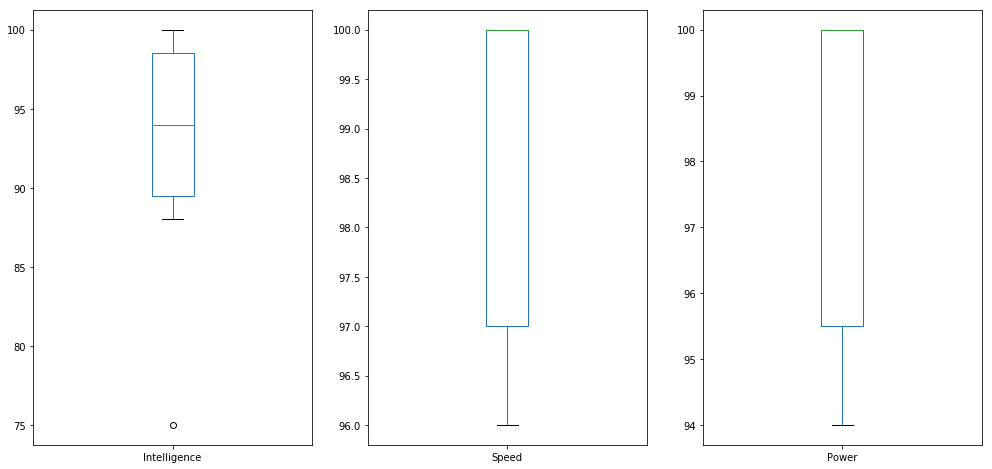

In [56]:
fig,(ax_1,ax_2,ax_3) = plt.subplots(1,3,figsize=[17,8])
super_best.Intelligence.plot(kind='box', ax=ax_1)
super_best.Speed.plot(kind='box', ax=ax_2)
super_best.Power.plot(kind='box', ax=ax_3)

In [72]:
d = [2,6,8,3,7,9,1,4]
me = df.mean()
(sum((df[0]-5)**2)/len(d))**0.5
df.std()

0    2.9277
dtype: float64